In [1]:
import math
import numpy as np 

def allPossibilities(N):
    if N == 1: return ["H","T"]
    List1 = ["H","T"]
    for x in range(N-1):
        List2 = []
        for x in List1:
                   List2.append(x+"H")
                   List2.append(x+"T")
        List1 = List2.copy()
    return List2

def probabilityXcoinsYheads(x,y,headChance=0.5):
    a = int(math.factorial(x)/math.factorial(y)/math.factorial(x-y))
    b = 2**x 
    c = a / b
    d = a*headChance**(y)*(1-headChance)**(x-y)
    return a,b,c,d

# sequence type should be str
def probability(sequence,coinPickChance,headChance):
    p = []
    for x in range(len(coinPickChance)):
        p.append(coinPickChance[x])
        for y in sequence:
            if y == "H": p[x]*=headChance[x]
            else: p[x]*=(1-headChance[x])        
    return sum(p)

def simulatingFlippingCoins(success=[1], size=1, coins=[1,0], probability=[0.5,0.5], tests=1000000):
    return sum([((np.random.choice(coins,size=(tests,size),p=probability)).sum(axis=1)==i).mean() for i in success])

In [6]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [10]:
allPossibilities(1)
allPossibilities(3)

['H', 'T']

['HHH', 'HHT', 'HTH', 'HTT', 'THH', 'THT', 'TTH', 'TTT']

In [11]:
import matplotlib.pyplot as plt

In [4]:
allPossibilities(3)

['HHH', 'HHT', 'HTH', 'HTT', 'THH', 'THT', 'TTH', 'TTT']

In [39]:
math.exp(1)

2.718281828459045

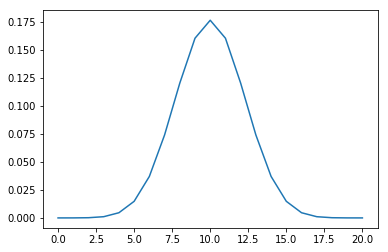

In [8]:
plt.plot([probabilityXcoinsYheads(20,x,headChance=0.5)[3] for x in range(21)]);

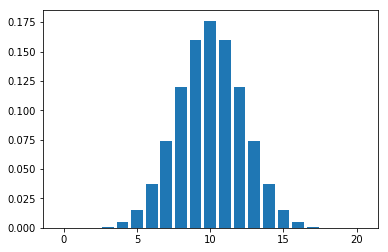

In [17]:
plt.bar(range(21),[probabilityXcoinsYheads(20,x,headChance=0.5)[3] for x in range(21)]);

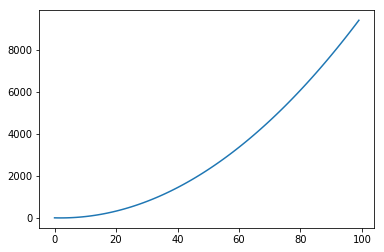

In [38]:
plt.plot(range(100),[((x-2)**2) for x in range(100)])


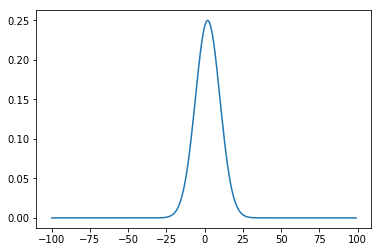

In [41]:
plt.plot(range(-100,100),[math.exp((((x-2)**2)/64)/-2)/4 for x in range(-100,100)])


In [34]:
simulatingFlippingCoins([0,2,4],4)

0.500202

In [88]:
# simulate 1 million tests of two fair coin flips
tests = np.random.randint(2, size=(1000000, 2))

# sums of all tests
test_sums = tests.sum(axis=1)

# proportion of tests that produced exactly two heads
(test_sums == 0).mean()


0.250048

In [35]:
simulatingFlippingCoins([2],2)

0.250262

In [40]:
probabilityXcoinsYheads(2,2)[3]

0.25

In [89]:
# simulate 1 million tests of three fair coin flips
tests = np.random.choice([0,1],size=(10000,3))

# sums of all tests
test_sums = tests.sum(axis=1)

# proportion of tests that produced exactly one head
(test_sums == 2).mean()

0.3773

In [90]:
# simulate 1 million tests of three biased coin flips
# hint: use np.random.choice()
tests = np.random.choice([0,1],size=(1000000,3),p=[0.6,0.4])

# sums of all tests
test_sums = tests.sum(axis=1)

# proportion of tests that produced exactly one head
(test_sums == 2).mean()

0.288705

In [91]:
# simulate 1 million tests of one die roll
tests = np.random.choice([1,2,3,4,5,6],size=10000)

# proportion of tests that produced an even number
np.mean([1 if x in [2,4,6] else 0 for x in tests])

0.496

In [92]:
# simulate the first million die rolls
first = np.random.choice([1,2,3,4,5,6],size=1000000)

# simulate the second million die rolls
second = np.random.choice([1,2,3,4,5,6],size=1000000)

# proportion of tests where the 1st and 2nd die rolled the same number
(first==second).mean()

0.167115

0.156242

In [124]:
# simulate 1 million tests of one fair coin flip
# remember, the output of these tests are the # successes, or # heads
tests = np.random.binomial(1, 0.5, int(1e6))

# proportion of tests that produced heads
(tests == 1).mean()

0.499976

In [125]:
# simulate 1 million tests of five fair coin flips
tests = np.random.binomial(5,0.5,int(1e6))

# proportion of tests that produced 1 head
(tests == 1).mean()

0.156387

In [127]:
probability("HTTTT",[1],[0.5])*5

0.15625

In [43]:
simulatingFlippingCoins([1],5)

0.156261

In [128]:
# simulate 1 million tests of ten fair coin flips
tests = np.random.binomial(10,0.5,int(1e6))

# proportion of tests that produced 4 heads
(tests == 4).mean()

0.205075

In [15]:
(simulatingFlippingCoins([0.5,0.5],(1000000,10)).sum(axis=1)==4).mean()

0.204865

In [23]:
z=[0,1]
sum([(simulatingFlippingCoins([0.5,0.5],(1000000,3)).sum(axis=1)==u).mean() for u in z])

0.499677

In [133]:
probabilityXcoinsYheads(10,4)[3]

0.205078125

In [134]:
# simulate 1 million tests of five biased coin flips
tests = np.random.binomial(5,0.8,int(1e6))

# proportion of tests that produced 5 heads
(tests == 5).mean()

0.328121

In [19]:
simulatingFlippingCoins(success=[5],size=5,probability=[0.8,0.2])

0.32793

In [18]:
probabilityXcoinsYheads(5,5,0.8)[3]

0.3276800000000001

In [136]:
probability("HHHHH",[1],[0.8])

0.32768000000000014

In [141]:
# simulate 1 million tests of ten biased coin flips
tests = np.random.binomial(10,0.15,int(1e6))

# proportion of tests that produced at least 3 heads
(tests >= 3).mean()

0.179311

In [140]:
y=0
for x in range(3,11):
    y+=probabilityXcoinsYheads(10,x,0.15)[3]
y

0.17980351963242186

In [14]:
sum([probabilityXcoinsYheads(10,x,0.15)[3] for x in range(3,11)])

0.17980351963242186

In [13]:
simulatingFlippingCoins(success=list(range(3,11)),size=10,probability=[0.15,0.85])

0.179899

In [2]:
def P(C,pC, nN,ca,no,po,ne): 
    return {ca:C, 
            no:1-C,
            
            po+ca:pC,
            ne+ca: 1-pC,
            po+no: 1-nN, 
            ne+no:nN,
            
            ca+"&"+po:C*pC,
            ca+"&"+ne:C*(1-pC), 
            no+"&"+po:(1-C)*(1-nN),
            no+"&"+ne:(1-C)*nN,
            
            po:C*pC+(1-C)*(1-nN), 
            ne:C*(1-pC)+(1-C)*(nN),
            
            ca+po: C*pC/(C*pC+(1-C)*(1-nN)),
            no+po:1-C*pC/(C*pC+(1-C)*(1-nN)),
            ca+ne:C*(1-pC)/(C*(1-pC)+(1-C)*(nN)),
            no+ne:1-C*(1-pC)/(C*(1-pC)+(1-C)*(nN))}

In [1]:
C = 0.105
pC = 0.905
nN = 0.795

In [2]:
C*pC/(C*pC+(1-C)*(1-nN))

0.34120287253141834

In [3]:
1-C*pC/(C*pC+(1-C)*(1-nN))

0.6587971274685817

In [4]:
C*(1-pC)/(C*(1-pC)+(1-C)*(nN))

0.01382536382536382

In [6]:
1-C*(1-pC)/(C*(1-pC)+(1-C)*(nN))

0.9861746361746362

In [ ]:
C*pC/(C*pC+(1-C)*(1-nN))
1-C*pC/(C*pC+(1-C)*(1-nN))
C*(1-pC)/(C*(1-pC)+(1-C)*(nN))
1-C*(1-pC)/(C*(1-pC)+(1-C)*(nN)

In [8]:
P(0.01,0.9,0.9,"-ca","-notca","-po",'-ne')
4/9

0.4444444444444444

In [27]:
P(0.5,0.8,0.5,"-red1","-green2","-seered3",'-seegreen4')

{'-red1': 0.5,
 '-green2': 0.5,
 '-seered3-red1': 0.8,
 '-seegreen4-red1': 0.19999999999999996,
 '-seered3-green2': 0.5,
 '-seegreen4-green2': 0.5,
 '-red1&-seered3': 0.4,
 '-red1&-seegreen4': 0.09999999999999998,
 '-green2&-seered3': 0.25,
 '-green2&-seegreen4': 0.25,
 '-seered3': 0.65,
 '-seegreen4': 0.35,
 '-red1-seered3': 0.6153846153846154,
 '-green2-seered3': 0.3846153846153846,
 '-red1-seegreen4': 0.28571428571428564,
 '-green2-seegreen4': 0.7142857142857144}

In [37]:
P(0.6,0.7,0.01,"-gone","-home","-rain",'-rain')

{'-gone': 0.6,
 '-home': 0.4,
 '-rain-gone': 0.30000000000000004,
 '-rain-home': 0.01,
 '-gone&-rain': 0.18000000000000002,
 '-home&-rain': 0.004,
 '-rain': 0.18400000000000002,
 '-gone-rain': 0.9782608695652174,
 '-home-rain': 0.021739130434782594}

In [44]:
P(0.2,0.3,0.95,"-A","-notA","-B",'-notB')

{'-A': 0.2,
 '-notA': 0.8,
 '-B-A': 0.3,
 '-notB-A': 0.7,
 '-B-notA': 0.050000000000000044,
 '-notB-notA': 0.95,
 '-A&-B': 0.06,
 '-A&-notB': 0.13999999999999999,
 '-notA&-B': 0.040000000000000036,
 '-notA&-notB': 0.76,
 '-B': 0.10000000000000003,
 '-notB': 0.9,
 '-A-B': 0.5999999999999998,
 '-notA-B': 0.40000000000000024,
 '-A-notB': 0.15555555555555553,
 '-notA-notB': 0.8444444444444444}

In [50]:
P(0.4,0.12,0.91,"-stop","-notStop","-yellow",'-notyellow')

{'-stop': 0.4,
 '-notStop': 0.6,
 '-yellow-stop': 0.12,
 '-notyellow-stop': 0.88,
 '-yellow-notStop': 0.08999999999999997,
 '-notyellow-notStop': 0.91,
 '-stop&-yellow': 0.048,
 '-stop&-notyellow': 0.35200000000000004,
 '-notStop&-yellow': 0.05399999999999998,
 '-notStop&-notyellow': 0.546,
 '-yellow': 0.10199999999999998,
 '-notyellow': 0.8980000000000001,
 '-stop-yellow': 0.47058823529411775,
 '-notStop-yellow': 0.5294117647058822,
 '-stop-notyellow': 0.39198218262806234,
 '-notStop-notyellow': 0.6080178173719377}

In [58]:
P(0.2,0.90,0.725,"-left","-notleft","-fast",'-notfast')

{'-left': 0.2,
 '-notleft': 0.8,
 '-fast-left': 0.9,
 '-notfast-left': 0.09999999999999998,
 '-fast-notleft': 0.275,
 '-notfast-notleft': 0.725,
 '-left&-fast': 0.18000000000000002,
 '-left&-notfast': 0.019999999999999997,
 '-notleft&-fast': 0.22000000000000003,
 '-notleft&-notfast': 0.58,
 '-fast': 0.4,
 '-notfast': 0.6,
 '-left-fast': 0.45,
 '-notleft-fast': 0.55,
 '-left-notfast': 0.03333333333333333,
 '-notleft-notfast': 0.9666666666666667}

In [60]:
P(0.01,0.90,0.95,"-cancer","-notcancer","-po",'-ne')

{'-cancer': 0.01,
 '-notcancer': 0.99,
 '-po-cancer': 0.9,
 '-ne-cancer': 0.09999999999999998,
 '-po-notcancer': 0.050000000000000044,
 '-ne-notcancer': 0.95,
 '-cancer&-po': 0.009000000000000001,
 '-cancer&-ne': 0.0009999999999999998,
 '-notcancer&-po': 0.049500000000000044,
 '-notcancer&-ne': 0.9405,
 '-po': 0.058500000000000045,
 '-ne': 0.9415,
 '-cancer-po': 0.15384615384615374,
 '-notcancer-po': 0.8461538461538463,
 '-cancer-ne': 0.0010621348911311734,
 '-notcancer-ne': 0.9989378651088688}

In [3]:
C = 0.01
pC = 0.9
nN = 0.9
P(0.01,0.9,0.9,"-ca","-notca","-po",'-ne')

{'-ca': 0.01,
 '-notca': 0.99,
 '-po-ca': 0.9,
 '-ne-ca': 0.09999999999999998,
 '-po-notca': 0.09999999999999998,
 '-ne-notca': 0.9,
 '-ca&-po': 0.009000000000000001,
 '-ca&-ne': 0.0009999999999999998,
 '-notca&-po': 0.09899999999999998,
 '-notca&-ne': 0.891,
 '-po': 0.10799999999999998,
 '-ne': 0.892,
 '-ca-po': 0.08333333333333336,
 '-notca-po': 0.9166666666666666,
 '-ca-ne': 0.0011210762331838563,
 '-notca-ne': 0.9988789237668162}

In [ ]:
bootstrap = [coffee_red.sample(200,replace=True).query('drinks_coffee == False').height.mean() for _ in range(10000)]